In [18]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [19]:

# Load a pre-trained model
model = YOLO("yolov8n.pt")  # 'n' = nano version (small & fast)

# Load an image
image_path = "/Users/macmini/Desktop/ObjectDetection/images/Faune_Sauvage.jpg"  # Replace with your image path
results = model(image_path)




image 1/1 /Users/macmini/Desktop/ObjectDetection/images/Faune_Sauvage.jpg: 448x640 1 bear, 57.9ms
Speed: 2.5ms preprocess, 57.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


In [20]:
# Show detected object names & confidence scores
for result in results:
    boxes = result.boxes
    for box in boxes:
        cls_id = int(box.cls[0])              # Class ID (integer)
        conf = float(box.conf[0])             # Confidence score (0-1)
        label = model.names[cls_id]           # Class name
        print(f"Detected {label} with confidence {conf:.2f}")



Detected: bear with confidence 0.62


In [22]:
# Plot the result in notebook

# results[0].plot() returns a numpy array image with drawings
output_img = results[0].plot()

# Convert BGR (OpenCV format) to RGB for matplotlib
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(output_img_rgb)
plt.axis("off")
plt.title("Detected Objects")
plt.show()

IndexError: list index out of range


image 1/1 /Users/macmini/Desktop/ObjectDetection/images/Faune_Sauvage.jpg: 448x640 1 bear, 49.2ms
Speed: 3.6ms preprocess, 49.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results for /Users/macmini/Desktop/ObjectDetection/images/Faune_Sauvage.jpg:
 - bear: 0.62


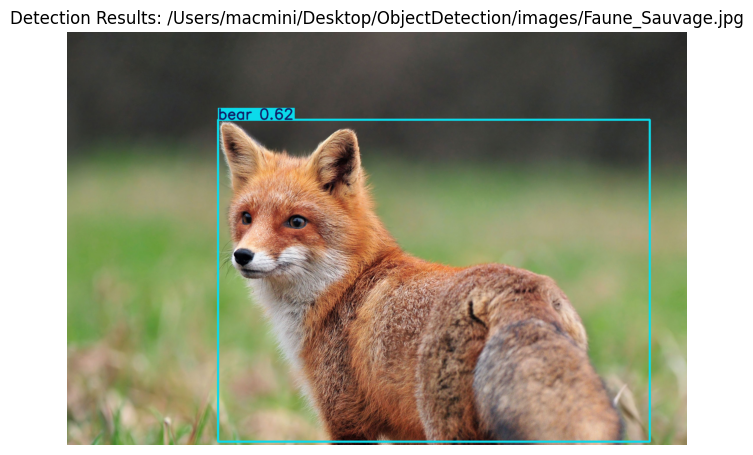


image 1/1 /Users/macmini/Desktop/ObjectDetection/images/person.jpeg: 448x640 1 person, 50.1ms
Speed: 1.2ms preprocess, 50.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Results for /Users/macmini/Desktop/ObjectDetection/images/person.jpeg:
 - person: 0.90


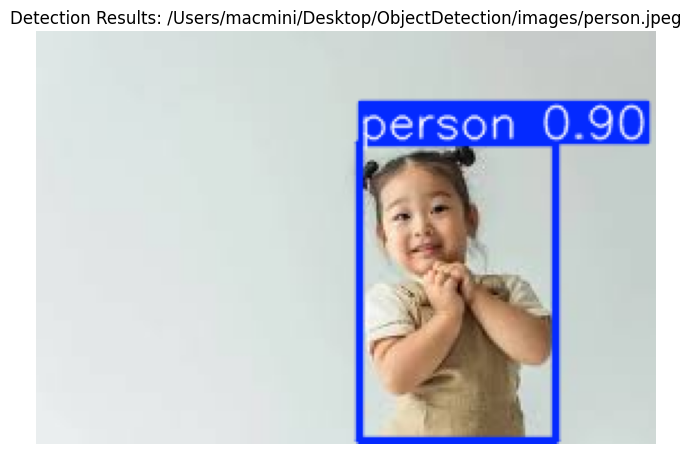


image 1/1 /Users/macmini/Desktop/ObjectDetection/images/ledomainedesfauves_animaux_suricates.jpg: 384x640 2 birds, 1 dog, 76.8ms
Speed: 1.1ms preprocess, 76.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results for /Users/macmini/Desktop/ObjectDetection/images/ledomainedesfauves_animaux_suricates.jpg:
 - bird: 0.66
 - dog: 0.58
 - bird: 0.40


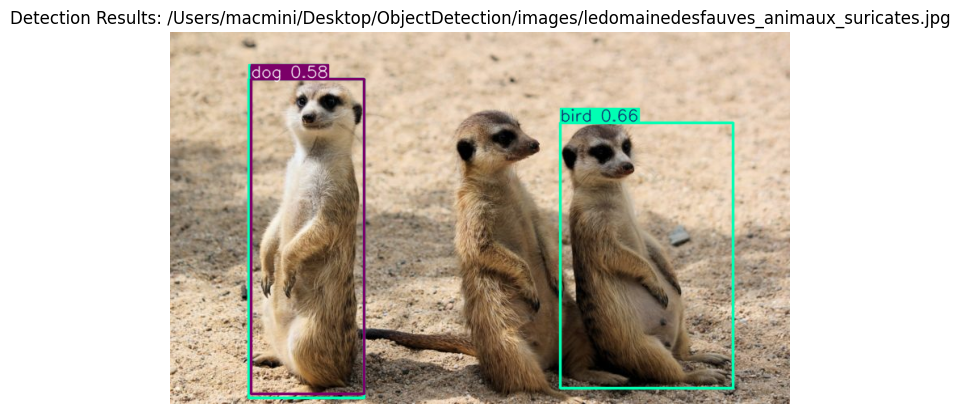


image 1/1 /Users/macmini/Desktop/ObjectDetection/images/30613-decouvrez-en-famille-les-animaux-qui-ne-v2_article_medium-5.jpg: 320x640 1 zebra, 37.8ms
Speed: 1.1ms preprocess, 37.8ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Results for /Users/macmini/Desktop/ObjectDetection/images/30613-decouvrez-en-famille-les-animaux-qui-ne-v2_article_medium-5.jpg:
 - zebra: 0.93


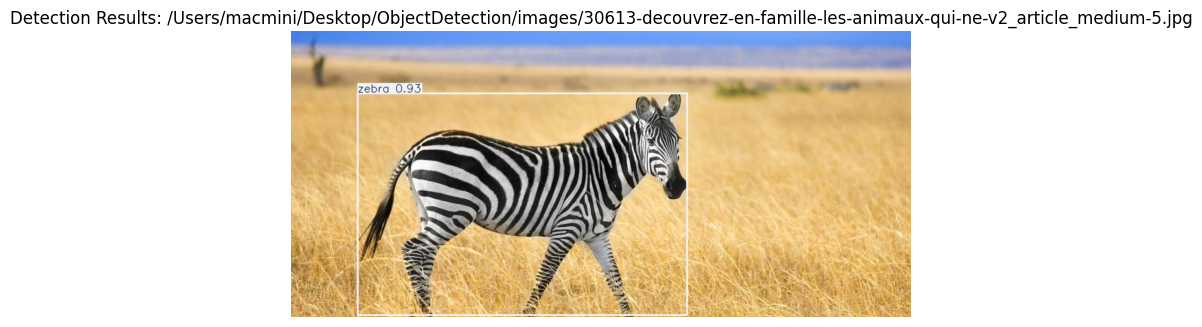

In [24]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os


# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

folder = "/Users/macmini/Desktop/ObjectDetection/images"
image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_files:
    results = model(image_path)
    
    # Print detected classes and confidence scores
    print(f"Results for {image_path}:")
    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.names[cls_id]
        print(f" - {label}: {conf:.2f}")

    # Plot and show the detection
    output_img = results[0].plot()
    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8,6))
    plt.imshow(output_img_rgb)
    plt.title(f"Detection Results: {image_path}")
    plt.axis("off")
    plt.show()
